# 18 - Computer lab 2

**To use the code, click the rocket icon at the top of the page, and then click Colab**. This will take you to a live version of this page where you can run the code. 

In this lab you will see how we can use scientific computing approaches to gain further insight into problems in mathematical biology. This lab will focus on gene regulatory models.

# Getting started #

Hopefully after the first lab most of you are now comfortable with how to perform some programming tasks in python. If you do not feel confident I suggest starting with the first lab on epidemic models instead.

# 1 - A simple gene model#

First we shall explore code for our first gene regulatory model, where $M$ represents mRNA concentration and $P$ protein concentration, given by the following ODEs,

\begin{eqnarray*}
\frac{dM}{dt} &= R(t)-\mu M\\
\frac{dP}{dt} &= kM-\nu P.
\end{eqnarray*}

The parameter $R(t)$ controls the transcription rate of mRNA by DNA, $k$ is the translation rate of mRNA into protein, and $\mu$ and $\nu$ are the respective degradation rates.

The code below assumes $R(t)=r$, where $r$ is some positive constant. This is the model we analysed in the lecture. Try varying some of the parameter values and initial concentrations and see how the time-courses change.


Text(0, 0.5, 'Protein')

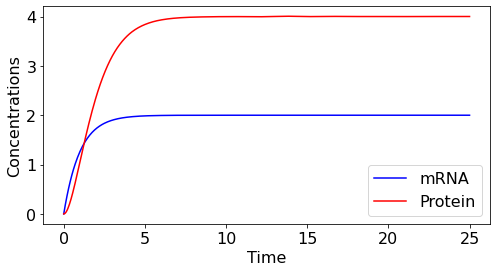

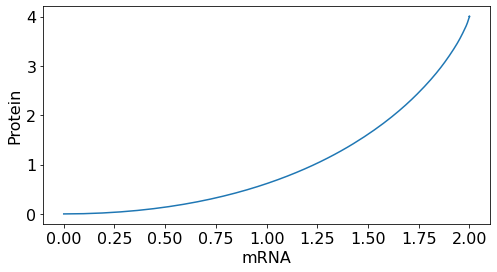

In [ ]:
#These are the modules we need to run some of our commands
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These make the plots look nicer
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 16})

# This function contains our ODEs
def disease(t,x):
    mdot=r-mu*x[0]
    pdot=k*x[0]-nu*x[1]
    return mdot, pdot

# We need to choose values for all of our model parameters
r=2        # Transcription rate
k=2      # Translation rate
mu=1     # mRNA degradation
nu=1     # protein degradation

# Now we specify time-points to run the model for and initial conditions for S0 and I0
ts=np.linspace(0,25,501)
x0=[0,0]

# The magic happens when we send it all to the solve_ivp function
xsol=solve_ivp(disease,[ts[0],ts[-1]],x0,t_eval=ts)

# And now we plot the output
plt.figure()
plt.plot(ts,xsol.y[0],'b',label='mRNA')
plt.plot(ts,(xsol.y[1]),'r',label='Protein')
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure1.png')

plt.figure()
plt.plot(xsol.y[0],xsol.y[1])
plt.xlabel('mRNA')
plt.ylabel('Protein')
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure2.png')

Here we assumed constant production of mRNA. In fact, this transcription often varies over time. We shall now explore two different varations of this model with time-vraying transcription rates.

Copy and paste all the code above into the cell below. Now alter the equations to take $R(t)=r_0(1+\sin(\omega t))$, such that the transcription of mRNA oscillates over time. You can implement a sine function by using:
```
np.sin(t)
```
What happens to the resulting dynamics? How does this depend on $r_0$ and $\omega$?

*Challenge: you can still calculate explicit solutions for $M(t)$ and (with more difficulty) $P(t)$ with this function for $R(t)$. Can you write down these solutions?*

Now let's take a 'step' function, such that mRNA transcription is either 'on' or 'off'. Accounting for step functions in programming can be awkward. One solution is that inside your ODE function, state the following:
```
R=(r if np.ceil(t)%2==0 else 0)
```
(and be sure to set the transcription rate as R in your equation). At each time-point that the ODE is checked, it will look at whether the rounded time-point is odd or even. If it is even the transcription rate is $r$ and otherwise it is 0. This gives a function 'jumping' between $r$ and 0 each integer time unit.

You may well find this initial plot is a bit 'messy'. This is because standard numerical ODE solvers can struggle with systems like this. Try adding the following statement to the end of the function where you call solve_ivp:
```
method='Radau'
```
You should now see a rather smoother solution.



# 2 - An auto-regulatory genetic circuit #

Let's extend our model to include feedbacks. In particular, we will assume that the concentration of protein impacts the transcription of mRNA. The system can now be given by,

\begin{eqnarray*}
\frac{dM}{dt} &= f(P)-\mu M\\
\frac{dP}{dt} &= kM-\nu P.
\end{eqnarray*}

In the previous lecture we found how the gradient $f'(P^*)$ at an equilibrium value $P^*$ is important to the nature and stability of the system. In particular, we focussed on an *auto-repressive* system (negative feedback) where $f'(P)<0$, such that increased protein leads to lower mRNA transcription. This system is programmed into the code below assuming $f(P)=A^2/(A^2+P^2)$. Vary the parameter values and initial conditions to see how the time-course and phase portrait change.

Text(0, 0.5, 'mRNA')

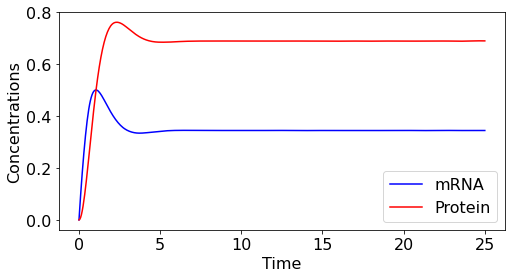

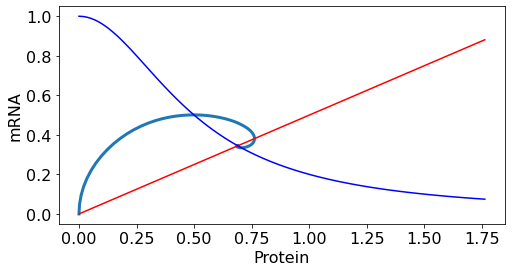

In [ ]:
#These are the modules we need to run some of our commands
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These make the plots look nicer
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 16})

# This function contains our ODEs
def disease(t,x):
    mdot=A**2/(A**2+x[1]**2)-mu*x[0]
    pdot=k*x[0]-nu*x[1]
    return mdot, pdot

# We need to choose values for all of our model parameters
A=0.5        # Transcription rate
k=2      # Translation rate
mu=1     # mRNA degradation
nu=1     # protein degradation

# Now we specify time-points to run the model for and initial conditions for S0 and I0
ts=np.linspace(0,25,501)
x0=[0,0]

# The magic happens when we send it all to the solve_ivp function
xsol=solve_ivp(disease,[ts[0],ts[-1]],x0,t_eval=ts)

# Calculate nullclines for plotting
pp=np.linspace(0,max(xsol.y[1])+1,101)
nullp=pp*nu/k
nullm=A**2/(mu*(A**2+pp**2))

# And now we plot the output
plt.figure()
plt.plot(ts,xsol.y[0],'b',label='mRNA')
plt.plot(ts,(xsol.y[1]),'r',label='Protein')
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure1.png')

plt.figure()
plt.plot(xsol.y[1],xsol.y[0],linewidth=3)
plt.plot(pp,nullp,'r')
plt.plot(pp,nullm,'b')
plt.xlabel('Protein')
plt.ylabel('mRNA')
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure2.png')

Now we will explore what happens with an *auto-activating* system, or with a positive feedback. The ODEs are the same but we now take a function $f(P)$ that has a positive gradient. This is a sneak-preview of our next lecture's content! A good function form to take here is $f(P)=\alpha+P^4/(P^4+A^4)$. It will helpful to skecth this out on a piece of paper - or even programme it into python (in the menu above go to 'Insert' and 'Code cell' to add a cell to do this) - to see what this looks like.

The code below currently has no parameter value sincluded (and if you try to run it you will get an error). Take the following set of parameter values: $k=2,\mu=1,\nu=2,\alpha=0,A=0.75$. Now gradually increase the value of $\alpha$ in steps of 0.1. What happens to the system as $\alpha$ changes?

In [ ]:
#These are the modules we need to run some of our commands
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These make the plots look nicer
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 16})

# This function contains our ODEs
def disease(t,x):
    mdot=alpha+x[1]**4/(A**4+x[1]**4)-mu*x[0]
    pdot=k*x[0]-nu*x[1]
    return mdot, pdot

# We need to choose values for all of our model parameters
alpha=
A=        # Transcription rate
k=      # Translation rate
mu=     # mRNA degradation
nu=     # protein degradation

# Now we specify time-points to run the model for and initial conditions for S0 and I0
ts=np.linspace(0,25,501)
x0=[0.1,0.1]

# The magic happens when we send it all to the solve_ivp function
xsol=solve_ivp(disease,[ts[0],ts[-1]],x0,t_eval=ts)

# Calculate nullclines for plotting
pp=np.linspace(0,2.5,101)
nullp=pp*nu/k
nullm=alpha/mu+pp**4/(mu*(A**4+pp**4))

# And now we plot the output
plt.figure()
plt.plot(ts,xsol.y[0],'b',label='mRNA')
plt.plot(ts,(xsol.y[1]),'r',label='Protein')
plt.ylim([0,2])
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure1.png')

plt.figure()
plt.plot(xsol.y[1],xsol.y[0],linewidth=3)
plt.plot(pp,nullp,'r')
plt.plot(pp,nullm,'b')
plt.xlabel('Protein')
plt.ylabel('mRNA')
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure2.png')

In this system we find bistability and switching of states. Initially there is only one equilibrium at $(M^*,P^*)=(0,0)$. As $\alpha$ increases, two new equilibria appear (a saddle-node bifurcation). There is then bistability between two equilbiria - one with low expression and one with high expression - but for the small initial conditions we have chosen we remain at the low expression state. As $\alpha$ increases further there is another saddle-node bifurcation where the two lower equilbiria are lost, and we return to just having one equilibrium but for high expression. Overall, then, we have seen how a cell's state might change from low to high expression of a gene due to some external change.

# 3: A two-gene circuit

We will finally look at a two-gene toggle switch, where there is *cross-repression*, such that the production of gene 1 represses the transcription of gene 2, and vice versa. The model of the two genes can be given as follows:

\begin{eqnarray*}
\frac{dM_1}{dt} &= f(P_2)-\mu M_1\\
\frac{dP_1}{dt} &= kM_1-\nu P_1\\
\frac{dM_2}{dt} &= f(P_1)-\mu M_2\\
\frac{dP_2}{dt} &= kM_2-\nu P_2.
\end{eqnarray*}

Notice that for simplicity we have assumed the two genes have the same rates for all processes - this can be relaxed.

With the parameters given, the system tends to a state where the two genes are in balance, with both being expressed at intermediate (and equal) amounts. Now try reducing the value of $\nu$, the degradation rate of protein.

Text(0, 0.5, 'Protein 2')

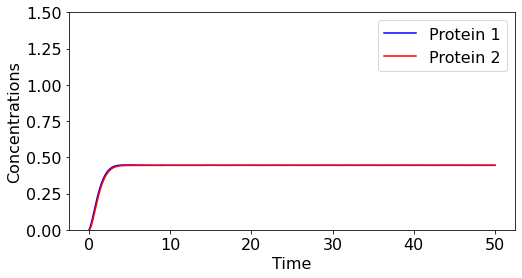

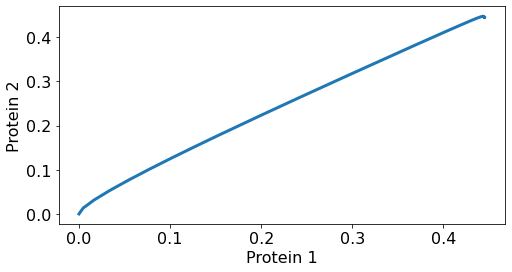

In [ ]:
#These are the modules we need to run some of our commands
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# These make the plots look nicer
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 16})

# This function contains our ODEs
def disease(t,x):
    m1dot=A**4/(A**4+x[3]**4)-mu*x[0]
    p1dot=k*x[0]-nu*x[1]
    m2dot=A**4/(A**4+x[1]**4)-mu*x[2]
    p2dot=k*x[2]-nu*x[3]
    return m1dot, p1dot, m2dot, p2dot

# We need to choose values for all of our model parameters
A=0.75        # Transcription rate
k=1      # Translation rate
mu=1     # mRNA degradation
nu=2     # protein degradation

# Now we specify time-points to run the model for and initial conditions for S0 and I0
ts=np.linspace(0,50,501)
x0=[0.1,0,0,0]

# The magic happens when we send it all to the solve_ivp function
xsol=solve_ivp(disease,[ts[0],ts[-1]],x0,t_eval=ts)

# Calculate nullclines for plotting
pp=np.linspace(0,2.5,101)
nullp=pp*nu/k
nullm=alpha/mu+pp**4/(mu*(A**4+pp**4))

# And now we plot the output
plt.figure()
plt.plot(ts,xsol.y[1],'b',label='Protein 1')
plt.plot(ts,(xsol.y[3]),'r',label='Protein 2')
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()
plt.ylim([0,1.5])
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure1.png')

plt.figure()
plt.plot(xsol.y[3],xsol.y[1],linewidth=3)
#plt.plot(pp,nullp,'r')
#plt.plot(pp,nullm,'b')
plt.xlabel('Protein 1')
plt.ylabel('Protein 2')
#To save your figure delete the '#' in the front of the line below. To find the saved file, click on the folder icon in the left-hand column of the screen.
#plt.savefig('myfigure2.png')

You should see that as you reduce the value of $\nu$, such that the protein takes longer to degrade and therefore remains in the cell longer, that the system shifts to a state of one gene being 'on' (with high expression) and the other being 'off' (with low, though not zero, expression). Which gene is switched on will depend on the initial values you use. Try to show this more clearly by running the model for two different sets of initial conditions, plotted on the same graph.

Now try altering the values such that the two genes can have different degradation and translation rates. What sorts of changes do you see?

# 4: Go wild!

If you have completed all of the suggested activities above, why not try to code up some of the other models we have seen in this module. Perhaps the within-host Covid or HIV models, or the wildlife epidemic model? Think about adding in or taking out different mechanisms to see how the behaviour of each one changes. Remember, all models are wrong but some are useful, so be creative!